In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import acquire
import prepare

#new imports!!
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

#### Create a new notebook, random_forests, and work with titanic data to do the following:

In [2]:
df = acquire.get_titanic_data()

csv file found and loaded


In [3]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [7]:
# prepare.prep_titanic_data?

In [8]:
train, validate, test = prepare.prep_titanic_data(df)

In [9]:
train.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,455,1,3,male,0,0,7.8958,Cherbourg,1,1,0,0
380,380,1,1,female,0,0,227.5250,Cherbourg,1,0,0,0
492,492,0,1,male,0,0,30.5000,Southampton,1,1,0,1
55,55,1,1,male,0,0,35.5000,Southampton,1,1,0,1
243,243,0,3,male,0,0,7.1250,Southampton,1,1,0,1


In [10]:
X_train = train.drop(columns = ['survived','sex','passenger_id','embark_town'])
X_train.head()

,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,3,0,0,7.8958,1,1,0,0
380,1,0,0,227.5250,1,0,0,0
492,1,0,0,30.5000,1,1,0,1
55,1,0,0,35.5000,1,1,0,1
243,3,0,0,7.1250,1,1,0,1


In [11]:
X_validate = validate.drop(columns = ['survived','sex','passenger_id','embark_town'])
X_test = test.drop(columns = ['survived','sex','passenger_id','embark_town'])

In [12]:
y_train = train.survived
y_train.head()

455    1
380    1
492    0
55     1
243    0
Name: survived, dtype: int64

In [13]:
y_validate = validate.survived
y_test = test.survived

#### Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [16]:
#make the object
rf = RandomForestClassifier(random_state=123, min_samples_leaf=1, max_depth=10)
rf

RandomForestClassifier(max_depth=10, random_state=123)

In [17]:
#fit the object
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [19]:
rf.predict(X_train)[:10]

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1])

In [21]:
y_pred = rf.predict(X_train)
y_pred[:10]

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1])

#### Evaluate your results using the model score, confusion matrix, and classification report.

In [22]:
rf.score(X_train, y_train)

0.9438202247191011

In [29]:
conf = confusion_matrix(y_train, y_pred)
conf

array([[324,   5],
       [ 25, 180]])

In [27]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       329
           1       0.97      0.88      0.92       205

    accuracy                           0.94       534
   macro avg       0.95      0.93      0.94       534
weighted avg       0.95      0.94      0.94       534



#### Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [33]:
labels = sorted(y_train.unique())
labels

[0, 1]

In [34]:
pd.DataFrame(conf,
            index=[str(label) + '_actual'for label in labels],
            columns=[str(label) + '_predict'for label in labels])

,0_predict,1_predict
0_actual,324,5
1_actual,25,180


Note: survive is our positive case

In [36]:
conf

array([[324,   5],
       [ 25, 180]])

In [35]:
TN, FP, FN, TP = conf.ravel()
TN, FP, FN, TP

(324, 5, 25, 180)

In [37]:
all_ = (TP + TN + FP + FN)

accuracy = (TP + TN) / all_
print(f"Accuracy: {accuracy}\n")

TPR = recall = TP / (TP + FN)
FPR = FP / (FP + TN)
print(f"True Positive Rate/Sensitivity/Recall/Power: {TPR}")
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {FPR}")

TNR = TN / (FP + TN)
FNR = FN / (FN + TP)
print(f"True Negative Rate/Specificity/Selectivity: {TNR}")
print(f"False Negative Rate/Miss Rate: {FNR}\n")

precision =  TP / (TP + FP)
f1 =  2 * ((precision * recall) / ( precision + recall))
print(f"Precision/PPV: {precision}")
print(f"F1 Score: {f1}\n")

support_pos = TP + FN
support_neg = FP + TN
print(f"Support (0): {support_pos}")
print(f"Support (1): {support_neg}")

Accuracy: 0.9438202247191011

True Positive Rate/Sensitivity/Recall/Power: 0.8780487804878049
False Positive Rate/False Alarm Ratio/Fall-out: 0.015197568389057751
True Negative Rate/Specificity/Selectivity: 0.9848024316109423
False Negative Rate/Miss Rate: 0.12195121951219512

Precision/PPV: 0.972972972972973
F1 Score: 0.923076923076923

Support (0): 205
Support (1): 329


#### Run through steps increasing your min_samples_leaf and decreasing your max_depth.

In [48]:
scores_all = []

for x in range(1,11):
    
    #make it
    rf = RandomForestClassifier(random_state=123, min_samples_leaf=x, max_depth=11-x)
    #fit it
    rf.fit(X_train, y_train)
    #transform it
    train_acc = rf.score(X_train, y_train)
    
    #evaluate on my validate data
    val_acc = rf.score(X_validate, y_validate)
    
    print(f'min_samples_leaf = {x} max_depth = {11-x}, accuracy = {train_acc, val_acc}')
    
    scores_all.append([x, 11-x, train_acc, val_acc])

min_samples_leaf = 1 max_depth = 10, accuracy = (0.9438202247191011, 0.7584269662921348)
min_samples_leaf = 2 max_depth = 9, accuracy = (0.8913857677902621, 0.7865168539325843)
min_samples_leaf = 3 max_depth = 8, accuracy = (0.8707865168539326, 0.7865168539325843)
min_samples_leaf = 4 max_depth = 7, accuracy = (0.8614232209737828, 0.797752808988764)
min_samples_leaf = 5 max_depth = 6, accuracy = (0.8426966292134831, 0.7921348314606742)
min_samples_leaf = 6 max_depth = 5, accuracy = (0.8370786516853933, 0.8089887640449438)
min_samples_leaf = 7 max_depth = 4, accuracy = (0.8258426966292135, 0.797752808988764)
min_samples_leaf = 8 max_depth = 3, accuracy = (0.8258426966292135, 0.7865168539325843)
min_samples_leaf = 9 max_depth = 2, accuracy = (0.7940074906367042, 0.7865168539325843)
min_samples_leaf = 10 max_depth = 1, accuracy = (0.7546816479400749, 0.7640449438202247)


In [52]:
scores_df = pd.DataFrame(scores_all, columns =['min_samples_leaf','max_depth','train_acc','val_acc'])
scores_df

,min_samples_leaf,max_depth,train_acc,val_acc
0,1,10,0.943820,0.758427
1,2,9,0.891386,0.786517
2,3,8,0.870787,0.786517
3,4,7,0.861423,0.797753
4,5,6,0.842697,0.792135
5,6,5,0.837079,0.808989
6,7,4,0.825843,0.797753
7,8,3,0.825843,0.786517
8,9,2,0.794007,0.786517
9,10,1,0.754682,0.764045


#### What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [54]:
scores_df['difference'] = scores_df.train_acc - scores_df.val_acc

In [55]:
scores_df

,min_samples_leaf,max_depth,train_acc,val_acc,difference
0,1,10,0.943820,0.758427,0.185393
1,2,9,0.891386,0.786517,0.104869
2,3,8,0.870787,0.786517,0.084270
3,4,7,0.861423,0.797753,0.063670
4,5,6,0.842697,0.792135,0.050562
5,6,5,0.837079,0.808989,0.028090
6,7,4,0.825843,0.797753,0.028090
7,8,3,0.825843,0.786517,0.039326
8,9,2,0.794007,0.786517,0.007491
9,10,1,0.754682,0.764045,-0.009363


#### After making a few models, which one has the best performance (or closest metrics) on both train and validate?

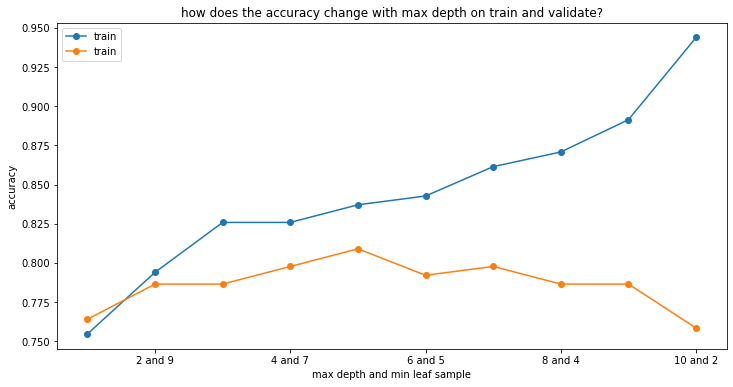

In [65]:
plt.figure(figsize=(12,6))
plt.plot(scores_df.max_depth, scores_df.train_acc, label='train', marker='o')
plt.plot(scores_df.max_depth, scores_df.val_acc, label='train', marker='o')
plt.xlabel('max depth and min leaf sample')
plt.ylabel('accuracy')

plt.xticks([2,4,6,8,10],
          [('2 and 9'),('4 and 7'),('6 and 5'),('8 and 4'),('10 and 2')]
          )

plt.title('how does the accuracy change with max depth on train and validate?')
plt.legend()
plt.show()

In [57]:
RandomForestClassifier?